# 1. Encoding

## 0. 데이터 불러오기

In [2]:
import warnings  
warnings.filterwarnings(action="ignore")

In [3]:
# [함수 설명]
#import = 모듈 불러오기 (R에서 library()와 동일합니다)
# as = import한 모듈를 code내에서 어떻게 지칭할 것인지 설정
import pandas as pd  
import os
import numpy as np

os.chdir("C://Users//user//Desktop/크롬드라이버/") # os.chdir = R에서의 setwd() 와 동일
data = pd.read_csv('Social_Network_Ads.csv') # read_csv = csv를 불러오는 함수 

In [4]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


*만약 해당 모듈을 설치하지 않았다면, import~를 적기에 앞서 <br>
!pip install (import함수안에 들어가는 모듈명) 형식으로 적어서 설치를 진행해주세요! <br>
ex) sklearn.preprocessing 설치 = !pip install sklearn.preprocessing <br>
이후 import sklearn.proprocessing ~ 진행!*

- ### **데이터 변형**

In [5]:
#수치형 변수 Age를 6개의 수준으로 구성된 범주형 변수로 변환
data['group_Age']= pd.cut(x=data['Age'],bins=6,labels = ['very young','young','less young','less old','old','very old '])

#필요없는 변수 지우기 (drop 함수)
data.drop(['User ID', 'Age'],axis=1,inplace=True)

#명목형 변수 임의 생성 (Region) - region이란 변수에서 400개 중복 추출
region = ['A','B','C','D']
import random
data['Region'] = [random.choice(region)for i in range(400)]

data=data.copy() #우리가 실제로 이후 모델에 적합할 데이터
data_1=data.copy() #적합시킬 데이터가 변하지 않도록 복사본 저장 = copy() 함수

In [6]:
#결측치 확인
#변수 마다 NA값이 존재하는지 확인 - 존재하지 않음
data.isna().sum() 

Gender             0
EstimatedSalary    0
Purchased          0
group_Age          0
Region             0
dtype: int64

In [7]:
data.shape #shpae() = 데이터셋의 행/열 수 확인

(400, 5)

- ### **데이터 확인**

In [8]:
#데이터가 어떻게 구성되어 있는지 확인해보자!
data.head() # = R에서의 head함수

,Gender,EstimatedSalary,Purchased,group_Age,Region
0,Male,19000,0,very young,C
1,Male,20000,0,less young,B
2,Female,43000,0,young,B
3,Female,57000,0,young,B
4,Male,76000,0,very young,C


In [9]:
# 변수별 형태 확인
data.dtypes 

Gender               object
EstimatedSalary       int64
Purchased             int64
group_Age          category
Region               object
dtype: object

#### [데이터 설명] ####
 **1) 반응변수(Y)** <br>
    - Purchased : 소비자가 해당 물건을 구매했는지 안했는지 (Binary)<br>
    (1 = 구매 / 0 = 구매하지 않음)
    
 **2) 설명변수(X)** <br>
    - Gender : 소비자의 성별<br>
    - EstimatedSalary : 소비자의 봉급<br>
    - group_Age : 소비자의 나이 범주<br>
    - Region : 소비자가 거주하는 지역 (임의 생성) - 나중에 모델을 적합 시에는 제외!

## 1. 인코딩

### 1) One-Hot Encoding - 변수 Region

In [10]:
# 1.pandas 모듈의의 get_dummies 함수 활용

#기존 데이터가 바뀌지 않도록 데이터명을 달리함(data_dummy1)
data_dummy = pd.get_dummies(data=data,columns=['Region'],prefix = 'Region')
data_dummy.head()
#인코딩 결과 Region변수 내 모든 수준에 대하여 가변수가 생성되었음을 알 수 있음 

,Gender,EstimatedSalary,Purchased,group_Age,Region_A,Region_B,Region_C,Region_D
0,Male,19000,0,very young,0,0,1,0
1,Male,20000,0,less young,0,1,0,0
2,Female,43000,0,young,0,1,0,0
3,Female,57000,0,young,0,1,0,0
4,Male,76000,0,very young,0,0,1,0


In [11]:
# 2.sklearn모듈의 OneHotEncoder 함수 활용 - 실제 적용
from sklearn.preprocessing import OneHotEncoder
#인코딩할 변수를 추출 > 가변수로 구성된 데이터 셋 형성 > 해당 데이터 셋을 원본에 붙여줌

#기준범주 제거 : drop = 'first' - 이 조건을 안 적으면 위 encoding과 동일하게 진행!
one_encoder = OneHotEncoder(drop='first')
one_encoded = pd.DataFrame(one_encoder.fit_transform(data['Region'].values.reshape(-1,1)).toarray(),columns=['Region_B','Region_C','Region_D'])

data = pd.concat([data,one_encoded],axis=1).drop(['Region'],axis=1) 
#concat(axis=1) = R의 cbind() / concat(axis=0) = R의 rbind()
data.head()

,Gender,EstimatedSalary,Purchased,group_Age,Region_B,Region_C,Region_D
0,Male,19000,0,very young,0.0,1.0,0.0
1,Male,20000,0,less young,1.0,0.0,0.0
2,Female,43000,0,young,1.0,0.0,0.0
3,Female,57000,0,young,1.0,0.0,0.0
4,Male,76000,0,very young,0.0,1.0,0.0


### 2) Label Encoding- 변수 Gender

In [12]:
# 1.sklearn모듈의 LabelEncoder 함수 활용 - 실제 적용
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

data.head() #Male이 1로 Female이 0으로 인코딩 되었음을 확인

,Gender,EstimatedSalary,Purchased,group_Age,Region_B,Region_C,Region_D
0,1,19000,0,very young,0.0,1.0,0.0
1,1,20000,0,less young,1.0,0.0,0.0
2,0,43000,0,young,1.0,0.0,0.0
3,0,57000,0,young,1.0,0.0,0.0
4,1,76000,0,very young,0.0,1.0,0.0


### 3) Ordinal Encoding- 변수 group_Age

In [13]:
data['group_Age']

0      very young
1      less young
2           young
3           young
4      very young
          ...    
395      less old
396           old
397           old
398    less young
399           old
Name: group_Age, Length: 400, dtype: category
Categories (6, object): ['very young' < 'young' < 'less young' < 'less old' < 'old' < 'very old ']

In [14]:
# 1.map함수 사용
#범주형 변수의 수준들의 순서를 입력하는 과정 필요
seq = {'very young' : 1, 'young' : 2, 'less young' : 3, 'less old' : 4, 'old' : 5 , 'very old':6}
data_1['group_Age'] = data_1['group_Age'].map(seq)
data_1.head()

,Gender,EstimatedSalary,Purchased,group_Age,Region
0,Male,19000,0,1.0,C
1,Male,20000,0,3.0,B
2,Female,43000,0,2.0,B
3,Female,57000,0,2.0,B
4,Male,76000,0,1.0,C


In [15]:
# 2.category_encoders모듈 OrdinalEncoder - 실제 적용
from category_encoders import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data['group_Age'] = ordinal_encoder.fit_transform(data['group_Age'])
data.head()

#OrdinalEncoder를 사용하기 위해선 변수가 '순서가 있는 범주형(category)변수' 여야 한다!
#group_Age같은 경우 데이터 변형 part에서 변수를 생성할 때 순서를 지정
#그러면, 일반 명목형 변수에 순서를 집어넣을 순 없을까? - 있다!

,Gender,EstimatedSalary,Purchased,group_Age,Region_B,Region_C,Region_D
0,1,19000,0,1,0.0,1.0,0.0
1,1,20000,0,3,1.0,0.0,0.0
2,0,43000,0,2,1.0,0.0,0.0
3,0,57000,0,2,1.0,0.0,0.0
4,1,76000,0,1,0.0,1.0,0.0


In [16]:
# 3.pd.Categorical() 함수 사용 - ordered = True
# 명목형 자료에 순서 정보 넣기 - 변수 Region 활용
data_1['Region'] = pd.Categorical(data_1['Region'],categories = ['A','B','C','D'],ordered=True)
data_1['Region']

0      C
1      B
2      B
3      B
4      C
      ..
395    A
396    B
397    D
398    C
399    C
Name: Region, Length: 400, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

### 5) Mean Encoding

In [17]:
#뒤이어 진행할 세 가지 Target Encoding은 모두 Estimated Salary를 
#반응변수로 가정하고 설명변수 Region에 대한 Encoding을 진행하겠습니다. 
data_1.drop(['Purchased', 'group_Age'],axis=1,inplace=True)
data_1

,Gender,EstimatedSalary,Region
0,Male,19000,C
1,Male,20000,B
2,Female,43000,B
3,Female,57000,B
4,Male,76000,C
...,...,...,...
395,Female,41000,A
396,Male,23000,B
397,Female,20000,D
398,Male,33000,C


In [18]:
#Region 별로 groupby
data_mean = data_1.copy()
mean_encoding = data_mean.groupby(['Region'])['EstimatedSalary'].mean().to_dict()

#map()로 적용
data_mean['Region'] = data_mean['Region'].map(mean_encoding)
data_mean

,Gender,EstimatedSalary,Region
0,Male,19000,68059.405941
1,Male,20000,70843.137255
2,Female,43000,70843.137255
3,Female,57000,70843.137255
4,Male,76000,68059.405941
...,...,...,...
395,Female,41000,68192.660550
396,Male,23000,70843.137255
397,Female,20000,72318.181818
398,Male,33000,68059.405941


### 5) Leave One Out Encoding

In [19]:
data_loo = data_1.copy()

from category_encoders import LeaveOneOutEncoder
loo_encoder = LeaveOneOutEncoder()
data_loo['Region'] = loo_encoder.fit_transform(data_loo['Region'],data_loo['EstimatedSalary'])
data_loo 

,Gender,EstimatedSalary,Region
0,Male,19000,68550.000000
1,Male,20000,71346.534653
2,Female,43000,71118.811881
3,Female,57000,70980.198020
4,Male,76000,67980.000000
...,...,...,...
395,Female,41000,68444.444444
396,Male,23000,71316.831683
397,Female,20000,72919.540230
398,Male,33000,68410.000000


### 6) Catboost Encoding

In [20]:
data_cat = data_1.copy()

from category_encoders import CatBoostEncoder
catboost_encoder = CatBoostEncoder()
data_cat['Region'] = catboost_encoder.fit_transform(data_cat['Region'],data_cat['EstimatedSalary'])
data_cat

,Gender,EstimatedSalary,Region
0,Male,19000,69742.500000
1,Male,20000,69742.500000
2,Female,43000,44871.250000
3,Female,57000,44247.500000
4,Male,76000,44371.250000
...,...,...,...
395,Female,41000,68456.353211
396,Male,23000,71301.397059
397,Female,20000,72883.437500
398,Male,33000,68747.425000


# 2. 분류평가지표

## 1. 모델 적합하기 - Logistic Regression

In [21]:
#임의로 생성한 변수이므로 모델 적합할 때는 제거하겠습니다. 
data.drop(['Region_B', 'Region_C','Region_D'],axis=1,inplace=True)

In [22]:
#사용할 데이터 확인
data.dtypes

Gender             int32
EstimatedSalary    int64
Purchased          int64
group_Age          int32
dtype: object

In [23]:
#설명변수와 반응변수(Purchased) 분리
x = data.iloc[:,data.columns != 'Purchased']
y = data.iloc[:,data.columns == 'Purchased'] 

#train set과 validation set 구분 : train_test_split
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #7:3 

# 변수 EstimatedSalary 스케일링 진행 - 이유는 밑에서 설명!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#train set
x_scale_tr = scaler.fit_transform(x_train['EstimatedSalary'].values.reshape(-1,1))
x_train.insert(0,'salary_scaled',x_scale_tr)
x_train.drop(['EstimatedSalary'],axis=1,inplace=True)

#test set
x_scale_te = scaler.fit_transform(x_test['EstimatedSalary'].values.reshape(-1,1))
x_test.insert(0,'salary_scaled',x_scale_te)
x_test.drop(['EstimatedSalary'],axis=1,inplace=True)

In [24]:
x_train

,salary_scaled,Gender,group_Age
305,-0.445088,1,4
271,0.204152,0,6
86,-0.415577,1,1
247,1.561653,0,6
20,-1.389436,1,4
...,...,...,...
326,0.086109,1,4
43,-1.596012,1,2
311,0.794370,1,3
58,-1.507480,1,1


#### +) Feature Scaling ####
1) 정의 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 <br>
2) 필요성 : <br>
-변수 값의 범위 또는 단위가 달라서 발생하는 문제 예방 <br>
-머신 러닝 모델이 특정 데이터의 편향성을 가지는 걸 방지 <br>
3) 종류 : <br>
-표준화 = 평균 0, 분산 1을 따르는 가우시안 정규 분포를 가진 값으로 변화 (StandardScaler)<br>
-정규화 = [0,1]사이의 분포를 지니도록 값을 조정 (MinMaxScaler)<br>

4) 그렇다면 위의 경우 왜 StandardScaler를 사용한 것일까? <br>
-로지스틱 회귀 ML 알고리즘은 수치형 변수의 경우 가우시안 분포를 지니고 있다고 가정을 하고 형성됨<br>
즉, 해당 변수들에 대하여 표준화를 적용하는 것이 예측 성능 향상에 중요한 요소로 작용! <br>
(이 외에도 표준화를 진행 해야 하는 경우 : Support Vector Machine, Linear Regression etc)

5) 주의사항<br>
위 경우처럼 train/test 분리할 시 feature scaling은 train/test는 분리 후 각 데이터 셋 별로 진행! 

In [60]:
#로지스틱 회귀 모델 적합 
from sklearn.linear_model import LogisticRegression 
l_re = LogisticRegression()

#적합
l_re.fit(x_train, y_train)
#예측
y_pred = l_re.predict(x_test) #validation set 통한 검증
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [62]:
#혼동행렬
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred,labels=[1,0]) 
print(matrix)

[[30 11]
 [ 8 71]]


In [63]:
#평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
ac = accuracy_score(y_test, y_pred) #accuracy(정확도)
pr = precision_score(y_test, y_pred) #precision(정밀도)
rc = recall_score(y_test, y_pred) #recall(민감도)
f1 = f1_score(y_test, y_pred) #F1-score
mc = matthews_corrcoef(y_test, y_pred) #MCC(매튜상관계수)

print(f'\nAccuracy : {ac:.4f} \nPrecision : {pr:.4f} \nRecall : {rc:.4f} \nF1-Score : {f1:.4f} \nMCC : {mc:.4f}')


Accuracy : 0.8417 
Precision : 0.7895 
Recall : 0.7317 
F1-Score : 0.7595 
MCC : 0.6428


      cutoff       fpr       tpr
0   1.989741  0.000000  0.000000
1   0.989741  0.000000  0.024390
2   0.973075  0.000000  0.146341
3   0.970282  0.000000  0.195122
4   0.857291  0.000000  0.390244
5   0.846129  0.000000  0.439024
6   0.830593  0.012658  0.439024
7   0.677736  0.012658  0.634146
8   0.670299  0.025316  0.634146
9   0.561855  0.050633  0.658537
10  0.558614  0.063291  0.658537
11  0.553502  0.063291  0.682927
12  0.528285  0.088608  0.682927
13  0.511388  0.088608  0.707317
14  0.502924  0.101266  0.707317
15  0.502922  0.101266  0.731707
16  0.499635  0.113924  0.731707
17  0.491173  0.113924  0.756098
18  0.474265  0.139241  0.756098
19  0.465831  0.177215  0.756098
20  0.427266  0.177215  0.804878
21  0.410782  0.189873  0.804878
22  0.394496  0.189873  0.829268
23  0.375354  0.202532  0.829268
24  0.265578  0.202532  0.926829
25  0.248693  0.215190  0.926829
26  0.233892  0.253165  0.926829
27  0.227880  0.265823  0.926829
28  0.224258  0.291139  0.926829
29  0.2070

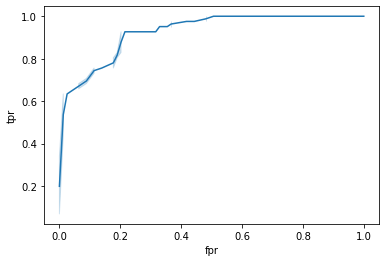

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
pred_pos_prob = l_re.predict_proba(x_test)[:, 1] #예측값이 1일 확률

fpr, tpr, cutoff = roc_curve(y_test, pred_pos_prob) #각 확률을 cutoff point로 정해서 ROC 그림! 

#ROC곡선 
df = {"cutoff":cutoff, "fpr":fpr, "tpr":tpr}
df = pd.DataFrame.from_dict(df) #Dataframe 형태로 변환
print(df)

import seaborn as sns 
sns.lineplot(x="fpr", y="tpr", data=df) #시각화

#AUC 계산
auc = roc_auc_score(y_test, prob_positive_pred)
print(f'\nAUC : {auc:.4f}')

# 3. 샘플링

- **앞에서 쓰인 변수들과 이름이 겹치기에 변수를 초기화하기 위해 위 Kernel-Restart를 진행하고 아래 코드를 실행시켜주세요 :)**

In [ ]:
import pandas as pd  
import os
import numpy as np
import seaborn as sns

In [ ]:
import warnings  
warnings.filterwarnings(action="ignore")

In [1]:
#본인 주소 설정해주기
os.chdir("C://Users//user//Desktop/크롬드라이버/") 

data_sample = pd.read_csv('transaction_sample.csv') 
data_sample

,isFraud,TransactionAmt,card1
0,0,68.50,13926
1,0,29.00,2755
2,0,59.00,4663
3,0,50.00,18132
4,0,50.00,4497
...,...,...,...
590535,0,49.00,6550
590536,0,39.50,10444
590537,0,30.95,12037
590538,0,117.00,7826


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

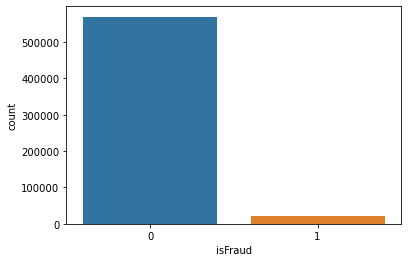

In [2]:
#설명변수와 반응변수 분리
y = data_sample['isFraud']
x = data_sample.drop(['isFraud'],axis=1)

#Y의 분포 확인 - 불균형 데이터!
sns.countplot(y) 

## 1. Under Sampling

### 1) Random Under Sampling

Sampling 전:  569877 
Sampling 후:  20663


<AxesSubplot:xlabel='isFraud', ylabel='count'>

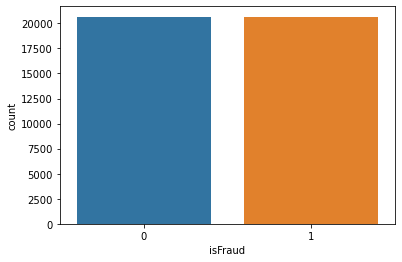

In [100]:
from imblearn.under_sampling import RandomUnderSampler
random_und_x, random_und_y = RandomUnderSampler(random_state = 10).fit_resample(x, y) # random_state는 R의 seed()와 같음! 
random_und = pd.concat([random_und_y,random_und_x],axis=1)

print('Sampling 전 0: ',sum(y==0) ,'\nSampling 후 0: ',sum(random_und['isFraud']==0))
sns.countplot(random_und['isFraud']) 

### 2) Tomek Links

Sampling 전:  569877 
Sampling 후 :  567964


<AxesSubplot:xlabel='isFraud', ylabel='count'>

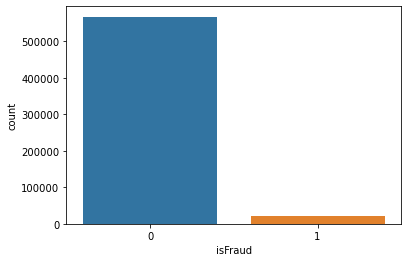

In [102]:
from imblearn.under_sampling import TomekLinks

TLinks_x, TLinks_y = TomekLinks().fit_resample(x, y)
TLinks = pd.concat([TLinks_y,TLinks_x],axis=1)

print('Sampling 전 0: ',sum(y==0) ,'\nSampling 후 0: ',sum(TLinks['isFraud']==0))
sns.countplot(TLinks['isFraud'])

#Tomek Link로 묶인 두 클래스의 데이터 중 majority에 해당하는 데이터만 제거
#즉, 두 데이터 간 경계에 있는 노이즈 데이터만 제거하기에 많은 수의 데이터가 줄진 않음
#해당 기법만 사용하면 좋은 성능을 보이지 않기에 보통 다른 기법과 결합해서 사용

## 2. Over Sampling

### 1) Random Over Sampling

Sampling 전 1 :  20663 
Sampling 후 1 :  569877


<AxesSubplot:xlabel='isFraud', ylabel='count'>

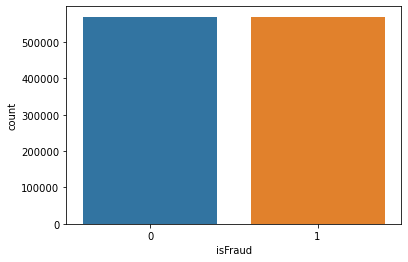

In [104]:
from imblearn.over_sampling import RandomOverSampler
random_over_x, random_over_y = RandomOverSampler(random_state = 10).fit_resample(x, y) 
random_over = pd.concat([random_over_y,random_over_x],axis=1)

print('Sampling 전 1 : ',sum(y==1) ,'\nSampling 후 1 : ',sum(random_over['isFraud']==1))
sns.countplot(random_over['isFraud']) 

### 2) SMOTE

Sampling 전 1 :  20663 
Sampling 후 1 :  569877


<AxesSubplot:xlabel='isFraud', ylabel='count'>

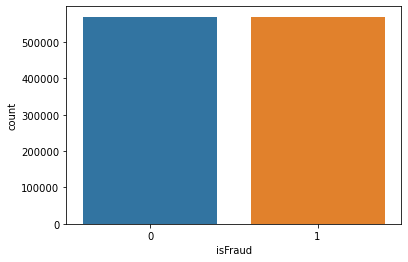

In [106]:
from imblearn.over_sampling import SMOTE
smote_x, smote_y = SMOTE().fit_resample(x, y) 
smote = pd.concat([smote_y,smote_x],axis=1)

print('Sampling 전 1 : ',sum(y==1) ,'\nSampling 후 1 : ',sum(smote['isFraud']==1))
sns.countplot(smote['isFraud']) 